Analytic and simulated solutions for FiveThirtyEight's Riddler Classic of 2017/06/30. [Link](https://fivethirtyeight.com/features/who-steals-the-most-in-a-town-full-of-thieves/)

### Question:

A town of 1,000 households has a strange law intended to prevent wealth-hoarding. On January 1 of every year, each household robs one other household, selected at random, moving all of that house’s money into their own house. The order in which the robberies take place is also random and is determined by a lottery. (Note that if House A robs House B first, and then C robs A, the houses of A and B would each be empty and C would have acquired the resources of both A and B.)

Two questions about this fateful day:

1. What is the probability that a house is not robbed over the course of the day?

2. Suppose that every house has the same amount of cash to begin with — say $100. Which position in the lottery has the most expected cash at the end of the day, and what is that amount?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Analytic solutions

#### Q1

There are $999$ other houses, and each house could rob you or one of 998 other houses. Thus the probability of not being robbed by a given house is $\frac{998}{999}$

Then the probability of not being robbed by all $999$ other houses is $(\frac{998}{999})^{999} \approx 0.368$

#### Q2

This is a zero-sum game: the sum of money in all the houses is always $999 \times 100 = 99900$

If a given house has not been robbed by the time their turn comes around, then the amount of money in all the other houses is $999 \times 100 - 100 = 99800$. Therefore this house can expect to steal $\frac{99800}{998} = 100$ on their turn.

If the given house has already been robbed then the amount of money in all the other houses is $999 \times 100 = 99900$, and this house can expect to steal $\frac{99900}{998} \approx 100.1$ 

Let $W$ denote a house's final weealth.

Each house can either:

1. Be robbed after its turn: $E(W) = 0$

2. Be robbed before its turn and not robbed after: $E(W) = \frac{99900}{998} \approx 100.1$

3. Avoid being robbed: $E(W) = 100 + \frac{99800}{998} = 100$

The probability of not being robbed after $k$ other houses have had their turn is $(\frac{998}{999})^k$

Let $i$ denote a given houses's position in the draw, with $1$ being the first house to go out stealing and $1000$ being the last house to go out stealing

$P(outcome \ 2) = (1 - (\frac{998}{999})^{i-1})(\frac{998}{999})^{1000 - i})$

$P(outcome \ 3) = (\frac{998}{999})^{999}$ as in question 1

$E(W) = \frac{99900}{998}(1 - (\frac{998}{999})^{i-1})(\frac{998}{999})^{1000 - i}) + 200(\frac{998}{999})^{999}$ 

$E(W)$ is greatest when $i=1000$ i.e. the last house has the highest expected wealth at the end of the day, with $W \approx 136.83$

### Simulation

#### Q2

In [2]:
lower_bound = 0
n_houses = 1000
n_trials = 10000
lottery_draws = pd.DataFrame(np.random.randint(0, n_houses, (n_trials, n_houses)))
# we create a dataframe where:
# each row is a trial
# column names are house numbers 0-999
# each entry i, j is the house number of the victim of the jth house on the ith trial
def check_self_robbing(lottery_draws, house):
    return (lottery_draws[house] == house)

for house in lottery_draws:
    # we fix all entries where houses are robbing themselves
    while check_self_robbing(lottery_draws, house).any():
        victim_check = check_self_robbing(lottery_draws, house)
        new_val = np.random.randint(lower_bound, n_houses, victim_check.sum())
        lottery_draws[house].loc[victim_check] = new_val

initial_distribution = {i:100 for i in range(n_houses)}
def single_trial(trial_number):
    distribution = initial_distribution.copy()
    for house in distribution:
        victim = lottery_draws.loc[trial_number, house]
        distribution[house] += distribution[victim]
        distribution[victim] = 0
    return distribution

trials = pd.DataFrame([single_trial(i) for i in range(n_trials)])

### $E(W)$ against lottery position

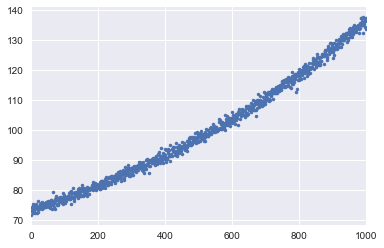

In [3]:
expectations = trials.mean()
expectations.plot(style='.')

In [4]:
expectations.nlargest(5)

991    137.74
993    137.54
985    137.52
984    137.50
998    137.39
dtype: float64

#### Note: 

The simulated solution converges somewhat slowly to the true answer, as we can see even with 10,000 trials the last house has failed to come out with the highest sample mean.